**Nazrin Abdinli - 150220925 - Final Exam Computer Assignment**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

**Question 4 -  Plotting the data points in D1 and in D2 as separate scatter plots**

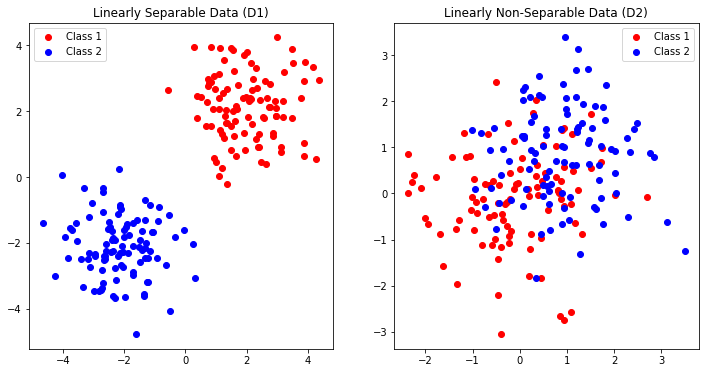

In [8]:
# Linearly separable data
np.random.seed(0)
X1_class1 = np.random.randn(100, 2) + [2, 2]
X1_class2 = np.random.randn(100, 2) + [-2, -2]
X1 = np.vstack((X1_class1, X1_class2))
y1 = np.hstack((np.ones(100), -1*np.ones(100)))

# Linearly non-separable data
X2_class1 = np.random.randn(100, 2)
X2_class2 = np.random.randn(100, 2) + [1, 1]
X2 = np.vstack((X2_class1, X2_class2))
y2 = np.hstack((np.ones(100), -1*np.ones(100)))

# Creating test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.1, stratify=y1, random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.1, stratify=y2, random_state=0)

# D1 plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X1_class1[:, 0], X1_class1[:, 1], color='red', label='Class 1')
plt.scatter(X1_class2[:, 0], X1_class2[:, 1], color='blue', label='Class 2')
plt.title('Linearly Separable Data (D1)')
plt.legend()

# D2 plotting
plt.subplot(1, 2, 2)
plt.scatter(X2_class1[:, 0], X2_class1[:, 1], color='red', label='Class 1')
plt.scatter(X2_class2[:, 0], X2_class2[:, 1], color='blue', label='Class 2')
plt.title('Linearly Non-Separable Data (D2)')
plt.legend()

plt.show()

**Question 5 - Implementing the hard-margin SVM and obtaining the results for D1. Reporting your test set results on T1.**

In [3]:
# Training hard-margin SVM on D1
hard_margin_svm = SVC(kernel='linear', C=1e10)
hard_margin_svm.fit(X1_train, y1_train)
y1_predicted = hard_margin_svm.predict(X1_test)
accuracy_hard = accuracy_score(y1_test, y1_predicted)

print(f"Hard-Margin SVM accuracy on D1: {accuracy_hard*100:.2f}%")
print(f"Test set predictions for T1 (SVM): {y1_predicted}")
print(f"True labels for T1 (SVM): {y1_test}")

Hard-Margin SVM accuracy on D1: 100.00%
Test set predictions for T1 (SVM): [-1.  1.  1.  1.  1. -1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1. -1.  1.
  1. -1.]
True labels for T1 (SVM): [-1.  1.  1.  1.  1. -1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1. -1.  1.
  1. -1.]


**Question 6 - Implementing the soft-margin SVM and obtaining the results for D2. Reporting also your test set results on T2.**

In [4]:
# Training soft-margin SVM on D2
soft_margin_svm = SVC(kernel='linear', C=1.0)
soft_margin_svm.fit(X2_train, y2_train)
y2_predicted = soft_margin_svm.predict(X2_test)
accuracy_soft = accuracy_score(y2_test, y2_predicted)

print(f"Soft-Margin SVM accuracy on D2: {accuracy_soft*100:.2f}%")
print(f"Test set predictions for T2 (SVM): {y2_predicted}")
print(f"True labels for T2 (SVM): {y2_test}")

Soft-Margin SVM accuracy on D2: 80.00%
Test set predictions for T2 (SVM): [ 1.  1. -1.  1.  1. -1. -1. -1.  1.  1. -1. -1. -1.  1.  1.  1. -1.  1.
 -1. -1.]
True labels for T2 (SVM): [-1.  1.  1.  1.  1. -1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1. -1.  1.
  1. -1.]


**Question 7 - Implementing a two-layer multi-layer-perceptron (MLP) structure and using it to classify the data points in D1 and D2. Comparing SVM results and MLP results and commenting.**

In [5]:
# MLP for D1
mlp1 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=0)
mlp1.fit(X1_train, y1_train)
y1_mlp_predicted = mlp1.predict(X1_test)
accuracy_hard_mlp = accuracy_score(y1_test, y1_mlp_predicted)
print(f"MLP accuracy on D1: {accuracy_hard_mlp*100:.2f}%")
print(f"Test set predictions for T1 (MLP): {y1_mlp_predicted}")
print(f"True labels for T1: {y1_test}")

# MLP for D2
mlp2 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=0)
mlp2.fit(X2_train, y2_train)
y2_mlp_predicted = mlp2.predict(X2_test)
accuracy_soft_mlp = accuracy_score(y2_test, y2_mlp_predicted)
print(f"MLP accuracy on D2: {accuracy_soft_mlp*100:.2f}%")
print(f"Test set predictions for T2 (MLP): {y2_mlp_predicted}")
print(f"True labels for T2: {y2_test}")

MLP accuracy on D1: 100.00%
Test set predictions for T1 (MLP): [-1.  1.  1.  1.  1. -1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1. -1.  1.
  1. -1.]
True labels for T1: [-1.  1.  1.  1.  1. -1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1. -1.  1.
  1. -1.]
MLP accuracy on D2: 75.00%
Test set predictions for T2 (MLP): [ 1.  1. -1. -1.  1. -1. -1. -1.  1.  1. -1. -1. -1.  1.  1.  1. -1.  1.
 -1. -1.]
True labels for T2: [-1.  1.  1.  1.  1. -1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1. -1.  1.
  1. -1.]


**Analyzing**

In [6]:
# Comparison of results
print(f"Comparison of SVM and MLP results:")
print("For D1:")
print(f"Hard-Margin SVM: {accuracy_hard*100:.2f}%")
print(f"MLP: {accuracy_hard_mlp*100:.2f}%")
print("For D2:")
print(f"Soft-Margin SVM: {accuracy_soft*100:.2f}%")
print(f"MLP: {accuracy_soft_mlp*100:.2f}%")

Comparison of SVM and MLP results:
For D1:
Hard-Margin SVM: 100.00%
MLP: 100.00%
For D2:
Soft-Margin SVM: 80.00%
MLP: 75.00%


**Commenting**

For D1(Linearly Separable Data), the Hard-Margin SVM achieved very high accuracy. This is expected because the data is perfectly separable, allowing the SVM to find a hyperplane with a maximum margin that completely separates the classes without any errors. The MLP also achieved high accuracy on this dataset. Despite its capability to learn complex non-linear functions, it effectively learned the linear boundary required for this data.

For D2(Linearly Non-Separable Data), the Soft-Margin SVM performed well, though not perfectly. It balances between maximizing the margin and minimizing classification errors, which is suitable for data that is not perfectly separable. The MLP also showed good performance on D2, demonstrating its strength in handling non-linear relationships within the data.